# Testing
----

### Sampling

Sample data is extracted data from population data. It is materials of data analysis, machine learning, estimation, prediction.

- Jackknife : Sampling without replacement.
- Re-Sampling with replacement
    - bootstrapping
        - `population -> sample data -> randomized re-sample data (with replacement == permit duplication data point)` calls bootstrapping.
        - for example, if we have sampled data = [50, 55, 60, 70, 80]
        - then, bootstrap is below
            - [50, 50, 50, 70, 70]
            - [60, 70, 80, 80, 80]
            - [50, 55, 60, 70, 80]
            - ...
        - now we can estimate trust area and standard error.
    - k-fold cross validation
        - split data to equal pieces
        - e.g) using $i$'th ~ $n-i$'th pieces as train, using n'th piece as valid data. and iteratively doing this in many pieces.
        - main purpose of cv(cross-validation) like methods, as split data to train and valid, we can get many errors in each trial. so we can use the trials.

----
### Testing

#### Define of testing

Testing is quantitative proof method for hypothesis about the `distribution of random variables`

- Process
    - 1. Make model : data into random variables with specific probability distribution. Call it `Hypothesis` - $ H $.
    - 2. Proof the hypothesis : statistical hypothsis testing, Call it `Testing`(검정).
    
- Null Hypothesis(귀무가설) : hypothesis for probability distribution's population. Written as $ H_0 $.
    - Null hypothesis must be equation. $ H_0 : \theta = \theta_0 $.
    - $ \theta $ is population's variable.
    - e.g. : Mean height of data is 170 -> ($ H_0 : \theta = 170 $)
- Alternative Hypothesis or Research Hypothesis(대립가설 or 연구가설) : hypothesis considered with Null hypothesis. Written as $ H_a $.
    - $ H_0 : \theta = \theta_0 $
    - $ H_a : \theta \ne \theta_0 $
    - e.g. : If we want to prove $\theta$ is bigger than $\theta_0$, null hypothesis and alternative hypothesis are below. Because null hypothesis must be equation.
        - $ H_0 : \theta = \theta_0 $
        - $ H_a : \theta > \theta_0 $

----
#### Test statistics (검정 통계량)

We need the proof of null hypothesis is true or false. Test statistics usually written as $t$.

- Test statistics : The result of a function that computes a sample data set as input.
    - $ t = f(x_1, x_2, ... x_n) $
- Test statistics also unpredictable. So test statistics $t$ is also represent as `Random Variable of Test Statistics` - $T$

----
#### p-value (유의확률)

Now we have two informations.

- Probability distribution of test statistics $t$. Written as $ p_T(x) $.
- Test statistics value $ t_0 $, calculated by real data. It means we have one sample of $ p_T(x) $.
- If Null hypothesis is true, $ t_0 $ is a value near the expected value comes out. 
    - It is p-value to quantify whether this value is easy or difficult in terms of probability.
    - **Define of p-value** : If we have `probability distribution` and `probability distribution's sample`, The probability of a corresponding sample value or a rarer value.
- Here is one example.

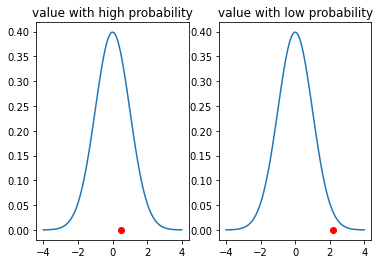

In [11]:
# -*- coding: utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import numpy as np

# Test statistics value with high probability
xx1 = np.linspace(-4,4,100)
plt.subplot(121)
plt.title("value with high probability")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, 'ro')

# Test statistics value with low probability
xx1 = np.linspace(-4,4,100)
plt.subplot(122)
plt.title("value with low probability")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, 'ro')

- Above data points are $t_0$
- The p-value = $ 2*min(P(t \le t_0), P(t \ge t_0)) $. It calls `Two-sided test p-value`.

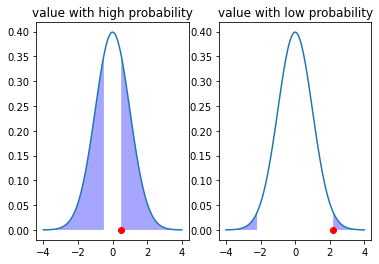

In [13]:
# -*- coding: utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import numpy as np

# Test statistics value with high probability
xx1 = np.linspace(-4,4,100)
plt.subplot(121)
plt.title("value with high probability")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, 'ro')
xx2 = np.linspace(-4,-0.5,100)
xx3 = np.linspace(0.5,4,100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)

# Test statistics value with low probability
xx1 = np.linspace(-4,4,100)
plt.subplot(122)
plt.title("value with low probability")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, 'ro')
xx2 = np.linspace(-4,-2.2,100)
xx3 = np.linspace(2.2,4,100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)

- The p-value in terms of testing : The probability that a test statistic value that is equal to the current test statistic value or closer to the alternative hypothesis will appear despite the null hypothesis is correct. Written as below
- $ P(t for H_a|H_0) $
- There are some p-values
    - two-sided test
    - one-sided test (single-tailed test)
        - right-side test
        - left-side test

----
#### Level of Significance (유의수준)

A small p-value means that the current test statistic is very unlikely to come out on the assumption that the null hypothesis is correct. So, if the p-value is very low, dismiss the null hypothesis and choose an alternative hypothesis.

- Usually the criteria for selection is [0.01, 0.05, 0.1]

----
### Summary of Testing

The whole process of tesing is below.

- 1. Assuming the data is random variable that has specific pdf.
- 2. The population of this probability distribution has specific value $ \theta $. And the null hypothesis is $ H_0 : \theta = \theta_0 $.
- 3. If the data is the samples are follow the null hypothesis, the outputs of function follow the specific distribution. It calls test statistics. And the test statistics follow test statistics probability distribution.
- 4. Caculate the p-value.
- 5. Judgement the result by criteria.

![testing_process](img/testing_process.png)

- Example : 이항 분포(베르누이 분포)를 따르는 동전 던지기를 15회 수행할 때, 이 동전 던지기는 공정한(확률이 0.5인) 동전 던지기인가?
    - $ H_0 : \mu = 0.5 $
    - $ t = \sum_{i=1}^{N}x_i = 12 $, 검정통계량 t는 앞면이 나온 횟수

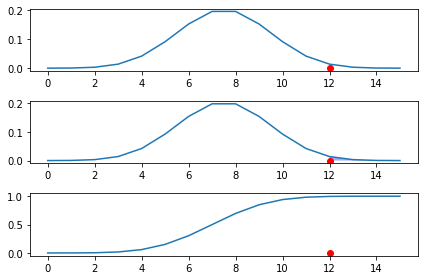

In [29]:
N = 15
mu = 0.5
rv = sp.stats.binom(N, mu)
xx = np.arange(N+1)
plt.subplot(311)
plt.plot(xx, rv.pmf(xx))
plt.plot(12, 0, 'ro')

plt.subplot(312)
plt.plot(xx, rv.pmf(xx))
xx1 = np.arange(12, N+1)
plt.plot(12, 0, 'ro')
plt.fill_between(xx1, rv.pmf(xx1), facecolor='blue', alpha=0.35)

plt.subplot(313)
plt.plot(xx, rv.cdf(xx))
plt.plot(12, 0, 'ro')

plt.tight_layout()
plt.show()

In [31]:
# two-sided
print("p-value:", 2*(1-rv.cdf(12-1)))

# one-sided
print("p-value:", 1-rv.cdf(12-1))

p-value: 0.03515625
p-value: 0.017578125


----
#### references
- https://datascienceschool.net/